In [1]:
print(__doc__)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)
sns.set()
sns.set_theme()

Automatically created module for IPython interactive environment


In [2]:
# Sub sample function
def balanced_subsample(data):
    
    sedData = data.loc[data.EventCode == 0]
    shapeSed = sedData.shape[0]
    
    standData = data.loc[data.EventCode == 1]
    shapeStand = standData.shape[0]
    
    stepData = data.loc[data.EventCode == 2]
    shapeSteps = stepData.shape[0]
    
    smallestClass = min([shapeSed, shapeStand, shapeSteps])
    #print('Smallest class is (' + str(smallestClass) + ')')
    
    newSedData = sedData.sample(smallestClass)
    newStandData = standData.sample(smallestClass)
    newStepData = stepData.sample(smallestClass)
    
    newDataFrame = pd.concat([newSedData, newStandData, newStepData], axis=0)
    
    return newDataFrame

In [3]:
# LOF removal
def lof_removal(X, y):
    
    ### This is my probelm...
    XTest = np.append(X, y)
    print(XTest)
    ### ----------------
    
    idxOfSed = y[y == 0].index
    idxOfStand = y[y == 1].index
    idxOfStep = y[y == 2].index
    
    X_embedded_sed = X[idxOfSed,:]
    # fit the model for outlier detection (default)
    clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
    # use fit_predict to compute the predicted labels of the training samples
    # (when LOF is used for outlier detection, the estimator has no predict,
    # decision_function and score_samples methods).
    y_pred = clf.fit_predict(X_embedded_sed)
    #n_errors = (y_pred != ground_truth).sum()
    X_scores = clf.negative_outlier_factor_  
    fig3, ax3 = plt.subplots()
    ax3.set_title("Local Outlier Factor (LOF) - Sed")
    ax3.scatter(X_embedded_sed[:, 0], X_embedded_sed[:, 1], color='k', s=3., label='Data points')
    # plot circles with radius proportional to the outlier scores
    radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
    ax3.scatter(X_embedded_sed[:, 0], X_embedded_sed[:, 1], s=1000 * radius, edgecolors='r',
                facecolors='none', label='Outlier scores')
    #plt.axis('tight')
    #ax3.set_xlim((-5, 5))
    #ax3.set_ylim((-5, 5))
    #plt.xlabel("prediction errors: %d" % (n_errors))
    #legend = plt.legend(loc='upper left')
    #legend.legendHandles[0]._sizes = [10]
    #legend.legendHandles[1]._sizes = [20]
    
    X_embedded_stand = X[idxOfStand,:]
    clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
    y_pred = clf.fit_predict(X_embedded_stand)
    X_scores = clf.negative_outlier_factor_  
    fig4, ax4 = plt.subplots()
    ax4.set_title("Local Outlier Factor (LOF) - Stand")
    ax4.scatter(X_embedded_stand[:, 0], X_embedded_stand[:, 1], color='k', s=3., label='Data points')
    radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
    ax4.scatter(X_embedded_stand[:, 0], X_embedded_stand[:, 1], s=1000 * radius, edgecolors='r',
                facecolors='none', label='Outlier scores')
    
    
    X_embedded_step = X[idxOfStep,:]
    clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
    y_pred = clf.fit_predict(X_embedded_step)
    X_scores = clf.negative_outlier_factor_  
    fig5, ax5 = plt.subplots()
    ax5.set_title("Local Outlier Factor (LOF) - Step")
    ax5.scatter(X_embedded_step[:, 0], X_embedded_step[:, 1], color='k', s=3., label='Data points')
    radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
    ax5.scatter(X_embedded_step[:, 0], X_embedded_step[:, 1], s=1000 * radius, edgecolors='r',
                facecolors='none', label='Outlier scores')
        
    size = min([len(X_embedded_sed), len(X_embedded_stand), len(X_embedded_step)])
    print(size)
    
    reduceSizeSed = (size - len(X_embedded_sed))*-1
    reduceSizeStand = (size - len(X_embedded_stand))*-1
    reduceSizeSteo = (size - len(X_embedded_step))*-1
    
    
    
    # Things to try:
    # Removing the outliers so that the groups are equal
    # Removing some outliers to see how that affects the data
    
    return

In [4]:
# Cam 1
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier, LocalOutlierFactor)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Individual Cambodian datasets
Shank = '../datastores/epochBasedAnalysisCAM1Shank/featureLearnerData.csv'
Thigh = '../datastores/epochBasedAnalysisCAM1Thigh/featureLearnerData.csv'
ShankPure = '../datastores/epochBasedAnalysisCAM1ShankPure/featureLearnerData.csv'
ThighPure = '../datastores/epochBasedAnalysisCAM1ThighPure/featureLearnerData.csv'

dataShank = pd.read_csv(Shank);
print(dataShank.shape)
dataThigh = pd.read_csv(Thigh);
print(dataThigh.shape)
dataShankPure = pd.read_csv(ShankPure);
print(dataShankPure.shape)
dataThighPure = pd.read_csv(ThighPure);
print(dataThighPure.shape)

#dataShank = balanced_subsample(dataShank)
#dataThigh = balanced_subsample(dataThigh)
#dataShankPure = balanced_subsample(dataShankPure)
#dataThighPure = balanced_subsample(dataThighPure)

#data = pd.concat([data1,data2,data3,data4,data5,data6,data7,data8], axis=0)
#data.shape

# Assigning variable names to input and output
inputs = dataShank.columns[:-2]
output = dataShank.columns[-2]

target_names = ['sitting', 'standing', 'stepping']
data_names = ['Shank Mixed', 'Thigh Mixed', 'Shank Pure', 'Thigh Pure']

n_neighbors = 3
random_state = 0

dataset = [dataShank, dataThigh, dataShankPure, dataThighPure]

for j, data in enumerate(dataset):
    # Assign data
    X = data.drop(columns=[output])
    y = data[output]

    # Split into train/test
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.2, stratify=y,
                         random_state=random_state)

    dim = len(X)
    n_classes = len(y.unique())

    # Reduce dimension to 2 with LinearDiscriminantAnalysis
    lda = make_pipeline(Normalizer(), LinearDiscriminantAnalysis(n_components=2))

    # Use a nearest neighbor classifier to evaluate the methods
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Make a list of the methods to be compared
    scale_methods = [('Normalized', lda)]

    for i, (name, dimensionReduce) in enumerate(scale_methods):
        fig, ax = plt.subplots()

        # Fit the method's model
        dimensionReduce.fit(X_train, y_train)
        
        # Embed the data set in 2 dimensions using the fitted model
        X_embedded = dimensionReduce.transform(X)
        fig2, ax2 = plt.subplots()
        x2 = sns.histplot(X_embedded)
        
        lof_removal(X_embedded, y)
        
        # Fit a nearest neighbor classifier on the embedded training set
        knn.fit(dimensionReduce.transform(X_train), y_train)

        # Compute the nearest neighbor accuracy on the embedded test set
        acc_knn = knn.score(dimensionReduce.transform(X_test), y_test)

        # Plot the projected points and show the evaluation score
        scatter = ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap='Set1')
        ax.set_title("{}, {}, KNN (k={})\nTest accuracy = {:.2f}".format(data_names[j],
                                                                      name,
                                                                      n_neighbors,
                                                                      acc_knn))

        # produce a legend with the unique colors from the scatter
        legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper left", title="Classes")
        ax.add_artist(legend1)
        
        disp = plot_confusion_matrix(knn, dimensionReduce.transform(X_test), y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
        
        print(disp.confusion_matrix)
        plt.grid(False)

    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../datastores/epochBasedAnalysisCAM1Shank/featureLearnerData.csv'

In [4]:
# Home 2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

Shank = '../datastores/epochBasedAnalysisHome2Shank/featureLearnerData.csv'
Thigh = '../datastores/epochBasedAnalysisHome2Thigh/featureLearnerData.csv'
ShankPure = '../datastores/epochBasedAnalysisHome2ShankPure/featureLearnerData.csv'
ThighPure = '../datastores/epochBasedAnalysisHome2ThighPure/featureLearnerData.csv'

dataShank = pd.read_csv(Shank);
print(dataShank.shape)
dataThigh = pd.read_csv(Thigh);
print(dataThigh.shape)
dataShankPure = pd.read_csv(ShankPure);
print(dataShankPure.shape)
dataThighPure = pd.read_csv(ThighPure);
print(dataThighPure.shape)

dataShank = balanced_subsample(dataShank)
dataThigh = balanced_subsample(dataThigh)
dataShankPure = balanced_subsample(dataShankPure)
dataThighPure = balanced_subsample(dataThighPure)

# Assigning variable names to input and output
inputs = dataShank.columns[:-2].union(dataShank.columns[-1:])
output = dataShank.columns[-2]

target_names = ['sitting', 'standing', 'stepping']
data_names = ['Shank Mixed', 'Thigh Mixed', 'Shank Pure', 'Thigh Pure']

n_neighbors = 10
random_state = 0

dataset = [dataShank, dataThigh, dataShankPure, dataThighPure]

for j, data in enumerate(dataset):
    # Assign data
    X = data.drop(columns=[output])
    y = data[output]

    # Split into train/test
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.2, stratify=y,
                         random_state=random_state)

    dim = len(X)
    n_classes = len(y.unique())

    # Reduce dimension to 2 with LinearDiscriminantAnalysis
    lda = make_pipeline(Normalizer(), LinearDiscriminantAnalysis(n_components=2))

    # Use a nearest neighbor classifier to evaluate the methods
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Make a list of the methods to be compared
    scale_methods = [('Normalized', lda)]

    for i, (name, model) in enumerate(scale_methods):
        fig, ax = plt.subplots()

        # Fit the method's model
        model.fit(X_train, y_train)

        # Fit a nearest neighbor classifier on the embedded training set
        knn.fit(model.transform(X_train), y_train)

        # Compute the nearest neighbor accuracy on the embedded test set
        acc_knn = knn.score(model.transform(X_test), y_test)

        # Embed the data set in 2 dimensions using the fitted model
        X_embedded = model.transform(X)

        # Plot the projected points and show the evaluation score
        scatter = ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap='Set1')
        plt.title("{}, {}, KNN (k={})\nTest accuracy = {:.2f}".format(data_names[j],
                                                                      name,
                                                                      n_neighbors,
                                                                      acc_knn))

        # produce a legend with the unique colors from the scatter
        legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper left", title="Classes")
        ax.add_artist(legend1)
        
        disp = plot_confusion_matrix(knn, model.transform(X_test), y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize='pred')
        
        print(disp.confusion_matrix)
        plt.grid(False)

    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../datastores/epochBasedAnalysisHome2Shank/featureLearnerData.csv'

In [5]:
# ICL 1
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

Shank = '../datastores/epochBasedAnalysisICL1ShankCropped/featureLearnerData.csv'
Thigh = '../datastores/epochBasedAnalysisICL1ThighCropped/featureLearnerData.csv'
ShankPure = '../datastores/epochBasedAnalysisICL1ShankPureCropped/featureLearnerData.csv'
ThighPure = '../datastores/epochBasedAnalysisICL1ThighPureCropped/featureLearnerData.csv'

dataShank = pd.read_csv(Shank);
print(dataShank.shape)
dataThigh = pd.read_csv(Thigh);
print(dataThigh.shape)
dataShankPure = pd.read_csv(ShankPure);
print(dataShankPure.shape)
dataThighPure = pd.read_csv(ThighPure);
print(dataThighPure.shape)

dataShank = balanced_subsample(dataShank)
dataThigh = balanced_subsample(dataThigh)
dataShankPure = balanced_subsample(dataShankPure)
dataThighPure = balanced_subsample(dataThighPure)

# Assigning variable names to input and output
inputs = dataShank.columns[:-2].union(dataShank.columns[-1:])
output = dataShank.columns[-2]

target_names = ['sitting', 'standing', 'stepping']
data_names = ['Shank Mixed', 'Thigh Mixed', 'Shank Pure', 'Thigh Pure']

n_neighbors = 10
random_state = 0

dataset = [dataShank, dataThigh, dataShankPure, dataThighPure]

for j, data in enumerate(dataset):
    # Assign data
    X = data.drop(columns=[output])
    y = data[output]

    # Split into train/test
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.2, stratify=y,
                         random_state=random_state)

    dim = len(X)
    n_classes = len(y.unique())

    # Reduce dimension to 2 with LinearDiscriminantAnalysis
    lda = make_pipeline(Normalizer(), LinearDiscriminantAnalysis(n_components=2))

    # Use a nearest neighbor classifier to evaluate the methods
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Make a list of the methods to be compared
    scale_methods = [('Normalized', lda)]

    for i, (name, model) in enumerate(scale_methods):
        fig, ax = plt.subplots()

        # Fit the method's model
        model.fit(X_train, y_train)

        # Fit a nearest neighbor classifier on the embedded training set
        knn.fit(model.transform(X_train), y_train)

        # Compute the nearest neighbor accuracy on the embedded test set
        acc_knn = knn.score(model.transform(X_test), y_test)

        # Embed the data set in 2 dimensions using the fitted model
        X_embedded = model.transform(X)

        # Plot the projected points and show the evaluation score
        scatter = ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap='Set1')
        plt.title("{}, {}, KNN (k={})\nTest accuracy = {:.2f}".format(data_names[j],
                                                                      name,
                                                                      n_neighbors,
                                                                      acc_knn))

        # produce a legend with the unique colors from the scatter
        legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper left", title="Classes")
        ax.add_artist(legend1)
        
        disp = plot_confusion_matrix(knn, model.transform(X_test), y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize='pred')
        
        print(disp.confusion_matrix)
        plt.grid(False)

    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../datastores/epochBasedAnalysisICL1ShankCropped/featureLearnerData.csv'

In [6]:
# Home 3
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

Shank = '../datastores/epochBasedAnalysisHome3Shank/featureLearnerData.csv'
Thigh = '../datastores/epochBasedAnalysisHome3Thigh/featureLearnerData.csv'
ShankPure = '../datastores/epochBasedAnalysisHome3ShankPure/featureLearnerData.csv'
ThighPure = '../datastores/epochBasedAnalysisHome3ThighPure/featureLearnerData.csv'

dataShank = pd.read_csv(Shank);
print(dataShank.shape)
dataThigh = pd.read_csv(Thigh);
print(dataThigh.shape)
dataShankPure = pd.read_csv(ShankPure);
print(dataShankPure.shape)
dataThighPure = pd.read_csv(ThighPure);
print(dataThighPure.shape)

dataShank = balanced_subsample(dataShank)
dataThigh = balanced_subsample(dataThigh)
dataShankPure = balanced_subsample(dataShankPure)
dataThighPure = balanced_subsample(dataThighPure)

# Assigning variable names to input and output
inputs = dataShank.columns[:-2].union(dataShank.columns[-1:])
output = dataShank.columns[-2]

target_names = ['sitting', 'standing', 'stepping']
data_names = ['Shank Mixed', 'Thigh Mixed', 'Shank Pure', 'Thigh Pure']

n_neighbors = 10
random_state = 0

dataset = [dataShank, dataThigh, dataShankPure, dataThighPure]

for j, data in enumerate(dataset):
    # Assign data
    X = data.drop(columns=[output])
    y = data[output]

    # Split into train/test
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.2, stratify=y,
                         random_state=random_state)

    dim = len(X)
    n_classes = len(y.unique())

    # Reduce dimension to 2 with LinearDiscriminantAnalysis
    lda = make_pipeline(Normalizer(), LinearDiscriminantAnalysis(n_components=2))

    # Use a nearest neighbor classifier to evaluate the methods
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Make a list of the methods to be compared
    scale_methods = [('Normalized', lda)]

    for i, (name, model) in enumerate(scale_methods):
        fig, ax = plt.subplots()

        # Fit the method's model
        model.fit(X_train, y_train)

        # Fit a nearest neighbor classifier on the embedded training set
        knn.fit(model.transform(X_train), y_train)

        # Compute the nearest neighbor accuracy on the embedded test set
        acc_knn = knn.score(model.transform(X_test), y_test)

        # Embed the data set in 2 dimensions using the fitted model
        X_embedded = model.transform(X)

        # Plot the projected points and show the evaluation score
        scatter = ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap='Set1')
        plt.title("{}, {}, KNN (k={})\nTest accuracy = {:.2f}".format(data_names[j],
                                                                      name,
                                                                      n_neighbors,
                                                                      acc_knn))

        # produce a legend with the unique colors from the scatter
        legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper left", title="Classes")
        ax.add_artist(legend1)
        
        disp = plot_confusion_matrix(knn, model.transform(X_test), y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize='pred')
        
        print(disp.confusion_matrix)
        plt.grid(False)

    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../datastores/epochBasedAnalysisHome3Shank/featureLearnerData.csv'

(30694, 138)
(38419, 138)
(24058, 138)
(30544, 138)
[[0.87602459 0.09439834 0.00762527]
 [0.11782787 0.76970954 0.10457516]
 [0.00614754 0.13589212 0.88779956]]


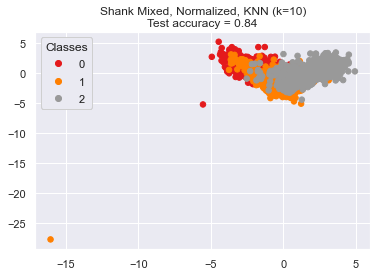

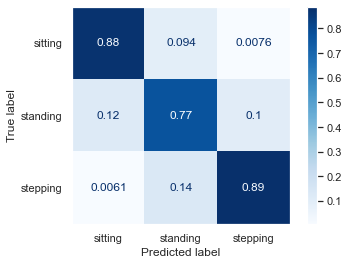

[[0.98104265 0.0121609  0.00387597]
 [0.01706161 0.89148737 0.07848837]
 [0.00189573 0.09635173 0.91763566]]


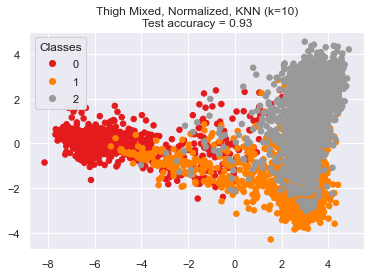

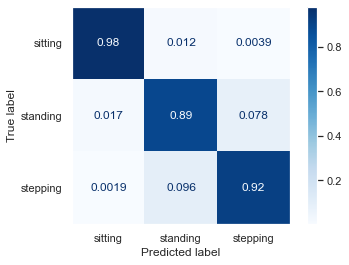

[[0.89400922 0.09177215 0.0015625 ]
 [0.10445469 0.88765823 0.01875   ]
 [0.0015361  0.02056962 0.9796875 ]]


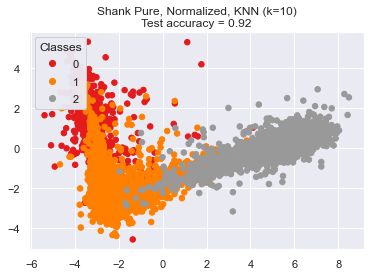

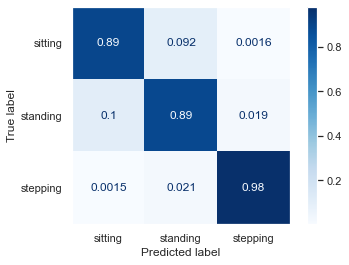

[[0.98991354 0.00292826 0.        ]
 [0.00864553 0.9897511  0.00872093]
 [0.00144092 0.00732064 0.99127907]]


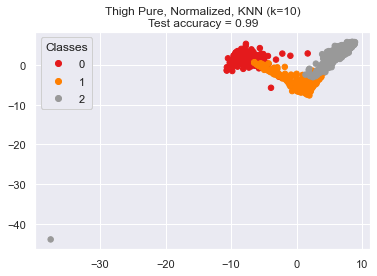

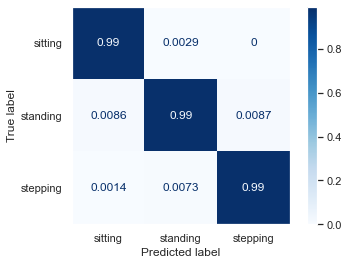

In [10]:
# Home 4
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

Shank = '../datastores/epochBasedAnalysisHome4Shank/featureLearnerData.csv'
Thigh = '../datastores/epochBasedAnalysisHome4Thigh/featureLearnerData.csv'
ShankPure = '../datastores/epochBasedAnalysisHome4ShankPure/featureLearnerData.csv'
ThighPure = '../datastores/epochBasedAnalysisHome4ThighPure/featureLearnerData.csv'

dataShank = pd.read_csv(Shank);
print(dataShank.shape)
dataThigh = pd.read_csv(Thigh);
print(dataThigh.shape)
dataShankPure = pd.read_csv(ShankPure);
print(dataShankPure.shape)
dataThighPure = pd.read_csv(ThighPure);
print(dataThighPure.shape)

dataShank = balanced_subsample(dataShank)
dataThigh = balanced_subsample(dataThigh)
dataShankPure = balanced_subsample(dataShankPure)
dataThighPure = balanced_subsample(dataThighPure)

# Assigning variable names to input and output
inputs = dataShank.columns[:-2].union(dataShank.columns[-1:])
output = dataShank.columns[-2]

target_names = ['sitting', 'standing', 'stepping']
data_names = ['Shank Mixed', 'Thigh Mixed', 'Shank Pure', 'Thigh Pure']

n_neighbors = 10
random_state = 0

dataset = [dataShank, dataThigh, dataShankPure, dataThighPure]

for j, data in enumerate(dataset):
    # Assign data
    X = data.drop(columns=[output])
    y = data[output]

    # Split into train/test
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.2, stratify=y,
                         random_state=random_state)

    dim = len(X)
    n_classes = len(y.unique())

    # Reduce dimension to 2 with LinearDiscriminantAnalysis
    lda = make_pipeline(Normalizer(), LinearDiscriminantAnalysis(n_components=2))

    # Use a nearest neighbor classifier to evaluate the methods
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Make a list of the methods to be compared
    scale_methods = [('Normalized', lda)]

    for i, (name, model) in enumerate(scale_methods):
        fig, ax = plt.subplots()

        # Fit the method's model
        model.fit(X_train, y_train)

        # Fit a nearest neighbor classifier on the embedded training set
        knn.fit(model.transform(X_train), y_train)

        # Compute the nearest neighbor accuracy on the embedded test set
        acc_knn = knn.score(model.transform(X_test), y_test)

        # Embed the data set in 2 dimensions using the fitted model
        X_embedded = model.transform(X)

        # Plot the projected points and show the evaluation score
        scatter = ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap='Set1')
        plt.title("{}, {}, KNN (k={})\nTest accuracy = {:.2f}".format(data_names[j],
                                                                      name,
                                                                      n_neighbors,
                                                                      acc_knn))

        # produce a legend with the unique colors from the scatter
        legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper left", title="Classes")
        ax.add_artist(legend1)
        
        disp = plot_confusion_matrix(knn, model.transform(X_test), y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize='pred')
        
        print(disp.confusion_matrix)
        plt.grid(False)

    plt.show()

- Data Home 2 -
(6577, 138)
(6577, 138)
(5113, 138)
(5113, 138)
- Data ICL 1 -
(2107, 138)
(2107, 138)
(1798, 138)
(1798, 138)
- Combined and balanced data -
(3594, 138)
(3594, 138)
(2241, 138)
(2241, 138)
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       239
           1       0.82      0.81      0.81       240
           2       0.88      0.91      0.90       240

    accuracy                           0.86       719
   macro avg       0.86      0.86      0.86       719
weighted avg       0.86      0.86      0.86       719



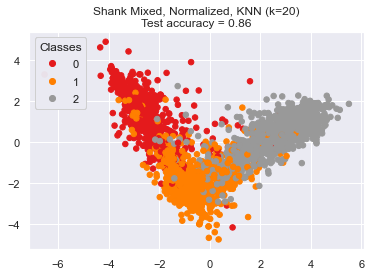

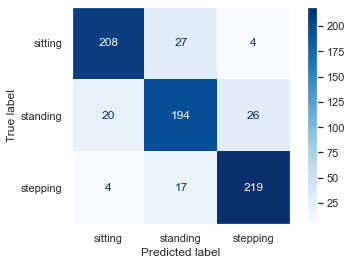

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       239
           1       0.89      0.92      0.91       240
           2       0.92      0.90      0.91       240

    accuracy                           0.93       719
   macro avg       0.94      0.93      0.93       719
weighted avg       0.94      0.93      0.93       719



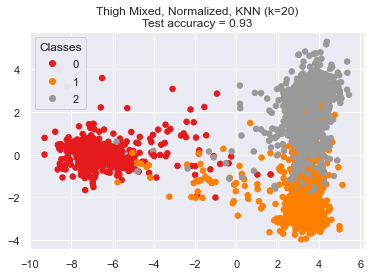

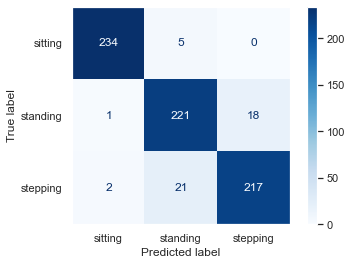

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       149
           1       0.93      0.89      0.91       150
           2       0.99      0.99      0.99       150

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



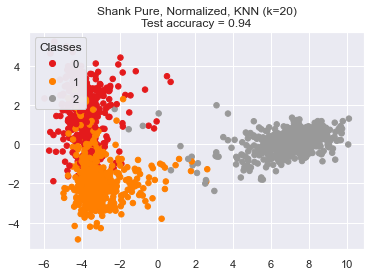

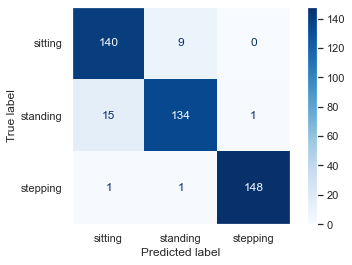

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       149
           1       0.99      0.97      0.98       150
           2       0.98      0.99      0.99       150

    accuracy                           0.99       449
   macro avg       0.99      0.99      0.99       449
weighted avg       0.99      0.99      0.99       449



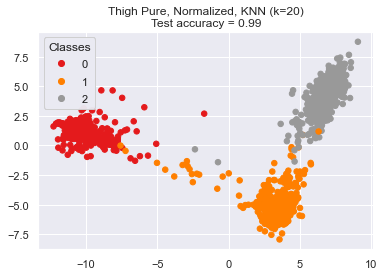

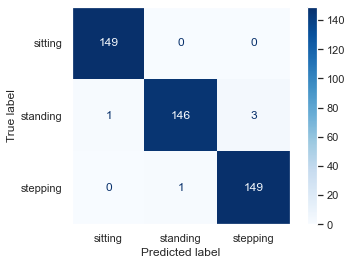

In [8]:
# Home 2 + ICL 1
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

Shank1 = '../output/nonOverlappingEPOCH/epochBasedAnalysisHome2Shank/featureLearnerData.csv'
Thigh1 = '../output/nonOverlappingEPOCH/epochBasedAnalysisHome2Thigh/featureLearnerData.csv'
ShankPure1 = '../output/nonOverlappingEPOCH/epochBasedAnalysisHome2ShankPure/featureLearnerData.csv'
ThighPure1 = '../output/nonOverlappingEPOCH/epochBasedAnalysisHome2ThighPure/featureLearnerData.csv'

Shank2 = '../output/nonOverlappingEPOCH/epochBasedAnalysisICL1ShankCropped/featureLearnerData.csv'
Thigh2 = '../output/nonOverlappingEPOCH/epochBasedAnalysisICL1ThighCropped/featureLearnerData.csv'
ShankPure2 = '../output/nonOverlappingEPOCH/epochBasedAnalysisICL1ShankPureCropped/featureLearnerData.csv'
ThighPure2 = '../output/nonOverlappingEPOCH/epochBasedAnalysisICL1ThighPureCropped/featureLearnerData.csv'

print('- Data Home 2 -')
dataShank1 = pd.read_csv(Shank1);
print(dataShank1.shape)
dataThigh1 = pd.read_csv(Thigh1);
print(dataThigh1.shape)
dataShankPure1 = pd.read_csv(ShankPure1);
print(dataShankPure1.shape)
dataThighPure1 = pd.read_csv(ThighPure1);
print(dataThighPure1.shape)
dataShank1 = balanced_subsample(dataShank1)
dataThigh1 = balanced_subsample(dataThigh1)
dataShankPure1 = balanced_subsample(dataShankPure1)
dataThighPure1 = balanced_subsample(dataThighPure1)

print('- Data ICL 1 -')
dataShank2 = pd.read_csv(Shank2);
print(dataShank2.shape)
dataThigh2 = pd.read_csv(Thigh2);
print(dataThigh2.shape)
dataShankPure2 = pd.read_csv(ShankPure2);
print(dataShankPure2.shape)
dataThighPure2 = pd.read_csv(ThighPure2);
print(dataThighPure2.shape)
dataShank2 = balanced_subsample(dataShank2)
dataThigh2 = balanced_subsample(dataThigh2)
dataShankPure2 = balanced_subsample(dataShankPure2)
dataThighPure2 = balanced_subsample(dataThighPure2)

print('- Combined and balanced data -')
dataShank = pd.concat([dataShank1,dataShank2,], axis=0)
dataThigh = pd.concat([dataThigh1,dataThigh2], axis=0)
dataShankPure = pd.concat([dataShankPure1,dataShankPure2], axis=0)
dataThighPure = pd.concat([dataThighPure1,dataThighPure2], axis=0)
print(dataShank.shape)
print(dataThigh.shape)
print(dataShankPure.shape)
print(dataThighPure.shape)

# Assigning variable names to input and output
inputs = dataShank.columns[:-2].union(dataShank.columns[-1:])
output = dataShank.columns[-2]

target_names = ['sitting', 'standing', 'stepping']
data_names = ['Shank Mixed', 'Thigh Mixed', 'Shank Pure', 'Thigh Pure']

n_neighbors = 20
random_state = 42

dataset = [dataShank, dataThigh, dataShankPure, dataThighPure]

for j, data in enumerate(dataset):
    # Assign data
    X = data.drop(columns=[output])
    y = data[output]

    # Split into train/test
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.2, stratify=y,
                         random_state=random_state)

    dim = len(X)
    n_classes = len(y.unique())

    # Reduce dimension to 2 with LinearDiscriminantAnalysis
    lda = make_pipeline(Normalizer(), LinearDiscriminantAnalysis(n_components=2))

    # Use a nearest neighbor classifier to evaluate the methods
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Make a list of the methods to be compared
    scale_methods = [('Normalized', lda)]

    for i, (name, model) in enumerate(scale_methods):
        fig, ax = plt.subplots()

        # Fit the method's model
        model.fit(X_train, y_train)

        # Fit a nearest neighbor classifier on the embedded training set
        knn.fit(model.transform(X_train), y_train)

        # Compute the nearest neighbor accuracy on the embedded test set
        acc_knn = knn.score(model.transform(X_test), y_test)

        # Embed the data set in 2 dimensions using the fitted model
        X_embedded = model.transform(X)

        # Plot the projected points and show the evaluation score
        scatter = ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap='Set1')
        plt.title("{}, {}, KNN (k={})\nTest accuracy = {:.2f}".format(data_names[j],
                                                                      name,
                                                                      n_neighbors,
                                                                      acc_knn))

        # produce a legend with the unique colors from the scatter
        legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper left", title="Classes")
        ax.add_artist(legend1)
        
        disp = plot_confusion_matrix(knn, model.transform(X_test), y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
        plt.grid(False)
        
        y_pred = knn.predict(model.transform(X_test))
        print(classification_report(y_test,y_pred))

    plt.show()

- Data Home 2 -
(6577, 138)
(6577, 138)
(5113, 138)
(5113, 138)
- Data ICL 1 -
(2107, 138)
(2107, 138)
(1798, 138)
(1798, 138)
- Combined and balanced data -
(3594, 138)
(3594, 138)
(2241, 138)
(2241, 138)
[0.87752525 0.74178404]


ValueError: Classification metrics can't handle a mix of continuous-multioutput and multiclass targets

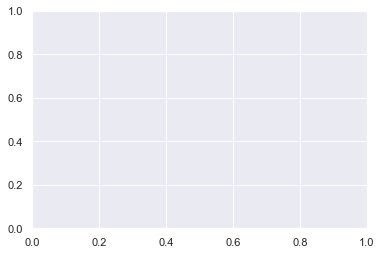

In [10]:
# Home 2 + ICL 1 Cross Validation (leave one group out)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import GroupKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

Shank1 = '../output/nonOverlappingEPOCH/epochBasedAnalysisHome2Shank/featureLearnerData.csv'
Thigh1 = '../output/nonOverlappingEPOCH/epochBasedAnalysisHome2Thigh/featureLearnerData.csv'
ShankPure1 = '../output/nonOverlappingEPOCH/epochBasedAnalysisHome2ShankPure/featureLearnerData.csv'
ThighPure1 = '../output/nonOverlappingEPOCH/epochBasedAnalysisHome2ThighPure/featureLearnerData.csv'

Shank2 = '../output/nonOverlappingEPOCH/epochBasedAnalysisICL1ShankCropped/featureLearnerData.csv'
Thigh2 = '../output/nonOverlappingEPOCH/epochBasedAnalysisICL1ThighCropped/featureLearnerData.csv'
ShankPure2 = '../output/nonOverlappingEPOCH/epochBasedAnalysisICL1ShankPureCropped/featureLearnerData.csv'
ThighPure2 = '../output/nonOverlappingEPOCH/epochBasedAnalysisICL1ThighPureCropped/featureLearnerData.csv'

print('- Data Home 2 -')
dataShank1 = pd.read_csv(Shank1);
print(dataShank1.shape)
dataThigh1 = pd.read_csv(Thigh1);
print(dataThigh1.shape)
dataShankPure1 = pd.read_csv(ShankPure1);
print(dataShankPure1.shape)
dataThighPure1 = pd.read_csv(ThighPure1);
print(dataThighPure1.shape)
dataShank1 = balanced_subsample(dataShank1)
dataThigh1 = balanced_subsample(dataThigh1)
dataShankPure1 = balanced_subsample(dataShankPure1)
dataThighPure1 = balanced_subsample(dataThighPure1)

print('- Data ICL 1 -')
dataShank2 = pd.read_csv(Shank2);
print(dataShank2.shape)
dataThigh2 = pd.read_csv(Thigh2);
print(dataThigh2.shape)
dataShankPure2 = pd.read_csv(ShankPure2);
print(dataShankPure2.shape)
dataThighPure2 = pd.read_csv(ThighPure2);
print(dataThighPure2.shape)
dataShank2 = balanced_subsample(dataShank2)
dataThigh2 = balanced_subsample(dataThigh2)
dataShankPure2 = balanced_subsample(dataShankPure2)
dataThighPure2 = balanced_subsample(dataThighPure2)

print('- Combined and balanced data -')
dataShank = pd.concat([dataShank1,dataShank2,], axis=0)
dataThigh = pd.concat([dataThigh1,dataThigh2], axis=0)
dataShankPure = pd.concat([dataShankPure1,dataShankPure2], axis=0)
dataThighPure = pd.concat([dataThighPure1,dataThighPure2], axis=0)
print(dataShank.shape)
print(dataThigh.shape)
print(dataShankPure.shape)
print(dataThighPure.shape)

# Assigning variable names to input and output
inputs = dataShank.columns[:-2]
output = dataShank.columns[-2]
groups = dataShank.columns[-1:]

target_names = ['sitting', 'standing', 'stepping']
data_names = ['Shank Mixed', 'Thigh Mixed', 'Shank Pure', 'Thigh Pure']

n_neighbors = 20
random_state = 42

dataset = [dataShank, dataThigh, dataShankPure, dataThighPure]

for j, data in enumerate(dataset):
    # Assign data
    X = data.drop(columns=[output])
    y = data[output]
    g = data[groups]

    dim = len(X)
    n_classes = len(y.unique())

    # Reduce dimension to 2 with LinearDiscriminantAnalysis
    lda = make_pipeline(Normalizer(), LinearDiscriminantAnalysis(n_components=2))

    # Use a nearest neighbor classifier to evaluate the methods
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # LeaveOneGroupOut
    group_kfold = GroupKFold(n_splits=2)
    #logo = LeaveOneGroupOut()
    #cv=logo.get_n_splits(X, y, g)
    
    # Make a list of the methods to be compared
    scale_methods = [('Normalized', lda)]

    for i, (name, model) in enumerate(scale_methods):
        fig, ax = plt.subplots()

        # Fit the method's model
        model.fit(X, y)
        
        # Fit a nearest neighbor classifier on the embedded training set
        acc_knn = cross_val_score(knn, model.transform(X), y, groups=g,  cv=group_kfold)
        print(acc_knn)
        
        f1_knn = classification_report(model.transform(X), y)
        print(f1_knn)

        # Embed the data set in 2 dimensions using the fitted model
        X_embedded = model.transform(X)

        # Plot the projected points and show the evaluation score
        scatter = ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap='Set1')
        plt.title("{}, {}, KNN (k={})\nTest accuracy = {:.2f}".format(data_names[j],
                                                                      name,
                                                                      n_neighbors,
                                                                      sum(acc_knn) / len(acc_knn)))
        # Classification Report
        print(classification_report())
        

        # produce a legend with the unique colors from the scatter
        legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper left", title="Classes")
        ax.add_artist(legend1)

    plt.show()

(6698, 138)


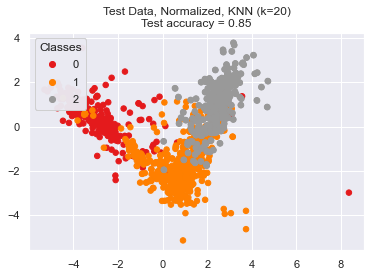

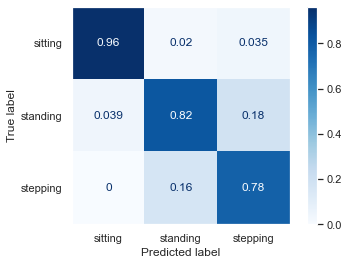

In [10]:
# Test
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

Data = '../datastores/featureLearnerData.csv'

data = pd.read_csv(Data);
print(data.shape)

data = balanced_subsample(data)

# Assigning variable names to input and output
inputs = data.columns[:-2]
output = data.columns[-2]

target_names = ['sitting', 'standing', 'stepping']

n_neighbors = 20
random_state = 0

# Assign data
X = data.drop(columns=[output])
y = data[output]

# Split into train/test
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, stratify=y,
                 random_state=random_state)

dim = len(X)
n_classes = len(y.unique())

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(Normalizer(), LinearDiscriminantAnalysis(n_components=2))

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Make a list of the methods to be compared
name = 'Normalized'
model = lda

fig, ax = plt.subplots()

# Fit the method's model
model.fit(X_train, y_train)

# Fit a nearest neighbor classifier on the embedded training set
knn.fit(model.transform(X_train), y_train)

# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = knn.score(model.transform(X_test), y_test)

# Embed the data set in 2 dimensions using the fitted model
X_embedded = model.transform(X)

# Plot the projected points and show the evaluation score
scatter = ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap='Set1')
plt.title("{}, {}, KNN (k={})\nTest accuracy = {:.2f}".format('Test Data',
                                                                      name,
                                                                      n_neighbors,
                                                                      acc_knn))

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper left", title="Classes")
ax.add_artist(legend1)
        
disp = plot_confusion_matrix(knn, model.transform(X_test), y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,
                                 normalize='pred');
        
plt.grid(False)
plt.show()

In [16]:
# Saving the algorithm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
import pickle

Data = '../datastores/featureLearnerData.csv'
data = pd.read_csv(Data);
data = balanced_subsample(data)

# Assigning variable names to input and output
inputs = data.columns[:-2]
output = data.columns[-2]

target_names = ['sitting', 'standing', 'stepping']

n_neighbors = 20
random_state = 0

# Assign data
X = data.drop(columns=[output])
y = data[output]

dim = len(X)
n_classes = len(y.unique())

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(Normalizer(), LinearDiscriminantAnalysis(n_components=2))

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Make a list of the methods to be compared
name = 'Normalized'
model = lda

# Fit the method's model
model.fit(X, y);

# Fit a nearest neighbor classifier on the embedded training set
knn.fit(model.transform(X), y);

#save the algorithm
filename = 'knn_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [18]:
# Testing out usage of the model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X, y)
print(result)

0.8969465648854962
